# **Multi-Class Classification Example (MNIST)**

In [ ]:
# Importing necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Preprocessing the data
 # normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

#train_labels = train_labels
#test_labels = test_labels

# Hot encoding
train_labels_h = to_categorical(train_labels)
test_labels_h = to_categorical(test_labels)

print(train_images.shape)
print(train_labels_h.shape)
print(test_images.shape)
print(test_labels_h.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


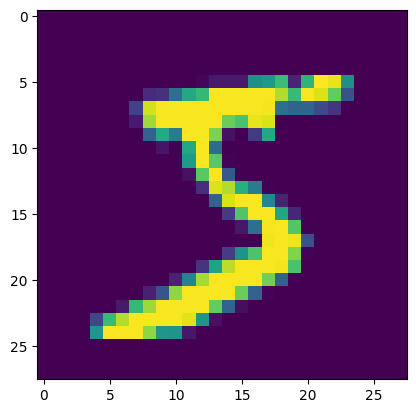

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


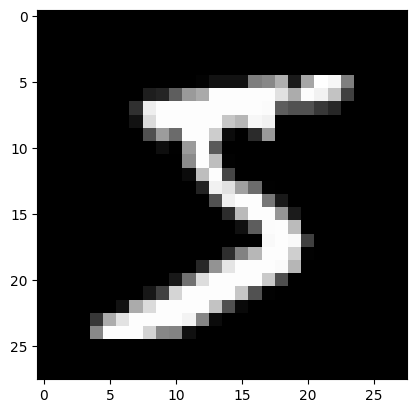

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap = 'gray')

print(train_labels[0])
print(train_labels_h[0])

In [ ]:
train_lab = to_categorical(train_labels_h[0])
print(train_lab)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Building the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model with Adam optimizer
import tensorflow as tf

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(train_images, train_labels_h, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8776 - loss: 0.4300
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.1191
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9770 - loss: 0.0781
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9822 - loss: 0.0574
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9868 - loss: 0.0435


**Accuracy:** Out of all the predictions we made, how many were true? This metric is only reliable if the dataset is class-balanced, meaning each class has the same number of samples.

**Precision:** Out of all the positive predictions we made, how many were true?

**Recall:** Out of all the data points that should be predicted as true, how many did we correctly predict as true?

**Precision** = True Positives / (True Positives + False Positives)

**Recall** = True Positives / (True Positives + False Negatives)

Say we have a detection model. If you have 20 items and the model predicted 10 items. Out of these, 4 predictions were wrong (FP) and 6 were correct (TP).

In this case, The precision is (6/10), ie 60% while the recall is (6/20) ie 30%.

**F1 Score:** F1 score is preferable to accuracy for class-imbalanced datasets. The highest possible value of an F-score is 1.0, indicating perfect precision and recall.

In [ ]:
# Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels_h) #batch size = 32
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0813
Test accuracy: 0.9771000146865845


In [ ]:
test_predicted = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


In [ ]:
print(test_labels[1])
print(test_predicted[1])

2
[5.0365145e-08 2.7077899e-06 9.9998862e-01 2.3684277e-06 7.0663787e-13
 2.5879116e-08 6.3941172e-09 5.0245249e-14 6.1971173e-06 1.7518468e-12]


In [ ]:
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(test_labels_h, test_predicted.round(),target_names=label_names))

              precision    recall  f1-score   support

     Class 0       0.98      0.99      0.99       980
     Class 1       0.99      0.98      0.99      1135
     Class 2       0.98      0.96      0.97      1032
     Class 3       0.97      0.98      0.98      1010
     Class 4       0.98      0.98      0.98       982
     Class 5       0.99      0.97      0.98       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.98      0.96      0.97      1028
     Class 8       0.96      0.98      0.97       974
     Class 9       0.97      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**1. micro avg**
Precision, recall, and F1 calculated globally:

Total TP / Total (TP + FP) for precision
Total TP / Total (TP + FN) for recall

✔️ Good for multi-class and multi-label problems
✔️ Handles imbalanced datasets

**2. macro avg**
Unweighted average of each class's precision, recall, and F1

Each class contributes equally, no matter how many examples it has

✔️ Good for seeing performance on rare classes
❌ Doesn't consider class imbalance

**3. weighted avg**
Average of each class’s metrics weighted by the number of true samples (support)

✔️ Balances for class imbalance
📌 This is often a better overall metric than macro when classes are uneven.

**4. samples avg**
Used in multi-label classification (each sample can have multiple labels)

Averages per-sample precision, recall, and F1

| **Averaging Method** | **How It's Calculated**                                    | **Best For**                                    | **Handles Class Imbalance?** | **Use Case**                           |
| -------------------- | ---------------------------------------------------------- | ----------------------------------------------- | ---------------------------- | -------------------------------------- |
| **Micro Average**    | Global sum of TP, FP, FN → one score across all classes    | Overall performance (multi-class & multi-label) | ✅ Yes                        | When total performance is key          |
| **Macro Average**    | Average of precision/recall/F1 for each class (unweighted) | Understanding per-class performance             | ❌ No                         | When rare classes are important        |
| **Weighted Average** | Average of per-class metrics weighted by class support     | Imbalanced datasets (more realistic summary)    | ✅ Yes                        | When some classes dominate the data    |
| **Samples Average**  | Average metrics per sample (in multi-label only)           | Multi-label problems (sample-wise evaluation)   | ✅ Yes (sample-based)         | When each instance has multiple labels |


Precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure can be interpreted as a weighted harmonic mean of the precision and recall: reaches its best value at 1 and its worst score at 0.

In [ ]:
# Compiling the model with Stochastic Gradient Descent optimizer
import tensorflow as tf

SGD = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(train_images, train_labels_h, validation_data=(test_images, test_labels_h), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9922 - loss: 0.0278 - val_accuracy: 0.9791 - val_loss: 0.0696
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9935 - loss: 0.0251 - val_accuracy: 0.9798 - val_loss: 0.0680
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0227 - val_accuracy: 0.9800 - val_loss: 0.0669
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0254 - val_accuracy: 0.9801 - val_loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0218 - val_accuracy: 0.9804 - val_loss: 0.0654


In [ ]:
# Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels_h) #batch size = 32
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0736
Test accuracy: 0.980400025844574


In [ ]:
test_labels[1]

np.uint8(2)

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predicted = model.predict(test_images)
test_predicted_classes = np.argmax(test_predicted,axis = 1)

cm = confusion_matrix(y_true = test_labels, y_pred = test_predicted_classes)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
[[ 972    0    0    1    0    0    1    1    3    2]
 [   0 1123    4    1    0    1    3    1    2    0]
 [   4    1 1011    2    1    0    2    5    6    0]
 [   1    0    1  996    0    3    0    4    3    2]
 [   2    0    4    1  962    0    2    2    0    9]
 [   2    0    0   12    0  871    3    0    2    2]
 [   3    2    1    1    6    4  939    1    1    0]
 [   2    4   10    5    1    0    0  996    1    9]
 [   2    0    2    6    2    4    4    2  950    2]
 [   1    3    1    5    7    2    0    4    2  984]]


|                     | **Predicted: Class 0** | **Predicted: Class 1** |
| ------------------- | ---------------------- | ---------------------- |
| **Actual: Class 0** | True Negative (TN)     | False Positive (FP)    |
| **Actual: Class 1** | False Negative (FN)    | True Positive (TP)     |


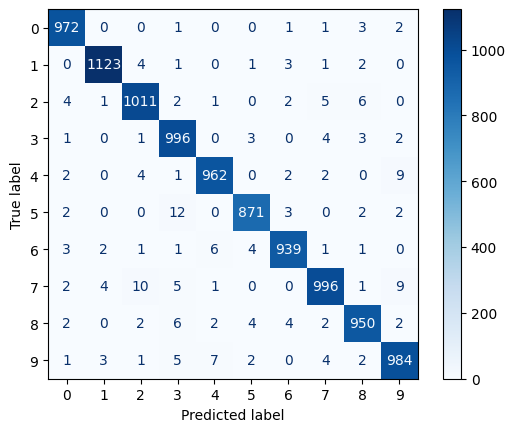

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Automatically adds 'Predicted' and 'True label' (actual)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(test_labels, test_predicted_classes, average='macro')) #average='macro'/'micro'/'weighted'/average=None
print('Recall: ', recall_score(test_labels, test_predicted_classes, average='macro'))
print('Accuracy: ', accuracy_score(test_labels, test_predicted_classes))
print('F1 Score: ', f1_score(test_labels, test_predicted_classes, average='macro'))

Precision:  0.9802312956669553
Recall:  0.9802534707637196
Accuracy:  0.9804
F1 Score:  0.9802366542989353


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale image
image = cv2.imread(train_images[0], cv2.IMREAD_GRAYSCALE)

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imread'
> Overload resolution failed:
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object
>  - Expected 'filename' to be a str or path-like object


In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# 1. Resize the image
resized = cv2.resize(train_images[0], (128, 128))

# 2. Normalize pixel values to [0, 1]
normalized = resized / 255.0

# 3. Histogram Equalization
equalized1 = cv2.equalizeHist(train_images[0].astype(np.uint8))

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized2 = clahe.apply(train_images[0].astype(np.uint8))  # img must be uint8

# 4. Gaussian Blur (smoothing)
blurred = cv2.GaussianBlur(resized, (5, 5), 0)

# 5. Binary Thresholding
_, thresholded1 = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

img_uint8 = (resized * 255).astype(np.uint8)
_, thresholded2 = cv2.threshold(img_uint8, 127, 255, cv2.THRESH_BINARY)

# 6. Canny Edge Detection
img_for_canny = (resized * 255).astype(np.uint8)  # If image is float in [0, 1]
edges = cv2.Canny(img_for_canny, 100, 200)

# Display results
titles = ['Original', 'Resized', 'Normalized', 'Equalized1', 'Equalized2',
          'Blurred', 'Thresholded1', 'Thresholded2','Edges']
images = [train_images[0], resized, normalized, equalized1, equalized2,
          blurred, thresholded1, thresholded2, edges]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
